# K-menas

- 가장 많이 사용되는 군집화 알고리즘
- 특정 중심점을 기준으로 가까이 있는 군집으로 선택
    - 특정 중심점의 개수가 K
    - 가까이라는 말은 거리로 정의
    - 거리 판단도 여러 종류(가까운 점, 먼 점)
- 군집이 형성되면 갱신
  
    
- initial point를 정하는 것이 문제가 됨   
[관련논문1](https://www.ijcsmc.com/docs/papers/July2013/V2I7201338.pdf)  
[kmeans++ 설명글](https://lovit.github.io/nlp/machine%20learning/2018/03/19/kmeans_initializer/)

## 분류와의 비교
- 분류는 정답을 아는 데이터로부터 정답을 만드는 과정
- 군집화는 정답을 모르는 데이터로부터 추측


[참고출처](https://scikit-learn.org/stable/modules/clustering.html)

In [1]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_iris

# load_iris().keys()
data = pd.DataFrame(load_iris().data, columns=load_iris().feature_names)
target = load_iris().target

In [2]:
load_iris().keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, max_iter=300, init='k-means++', random_state=2019)

res = km.fit(data)

In [4]:
res.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [5]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
def labeling(a):
    if a == 1:
        return 0
    elif a == 0:
        return 1
    else:
        return 2
    
map_res = np.array(list(map(labeling, res.labels_)))

In [7]:
map_res

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [8]:
def acurate(a, b):
    c = 0
    for i in range(len(a)):
        if a[i] == b[i]:
            c += 1
    return round(c/len(a), 3)

print(acurate(target, map_res))

0.893


In [9]:
n = 3
km = KMeans(n_clusters=n, max_iter=300, init='k-means++', random_state=12)

res = km.fit(data)

map_res = np.array(list(map(labeling, res.labels_)))
print(acurate(target, res.labels_))

0.893


In [10]:
ans = []
for i in range(1, 10):
    km = KMeans(n_clusters=i, max_iter=300, init='k-means++', random_state=2019)

    res = km.fit(data)

    map_res = np.array(list(map(labeling, res.labels_)))
    ans.append(acurate(target, map_res))
    print(i)
    print(res.cluster_centers_)
    print('----------------')

1
[[5.84333333 3.05733333 3.758      1.19933333]]
----------------
2
[[5.00566038 3.36981132 1.56037736 0.29056604]
 [6.30103093 2.88659794 4.95876289 1.69587629]]
----------------
3
[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]
----------------
4
[[5.53214286 2.63571429 3.96071429 1.22857143]
 [5.006      3.428      1.462      0.246     ]
 [6.9125     3.1        5.846875   2.13125   ]
 [6.2525     2.855      4.815      1.625     ]]
----------------
5
[[5.508      2.6        3.908      1.204     ]
 [6.52916667 3.05833333 5.50833333 2.1625    ]
 [5.006      3.428      1.462      0.246     ]
 [6.20769231 2.85384615 4.74615385 1.56410256]
 [7.475      3.125      6.3        2.05      ]]
----------------
6
[[4.70454545 3.12272727 1.41363636 0.2       ]
 [6.20769231 2.85384615 4.74615385 1.56410256]
 [5.508      2.6        3.908      1.204     ]
 [7.475      3.125      6.3        2.05      ]
 [5.2

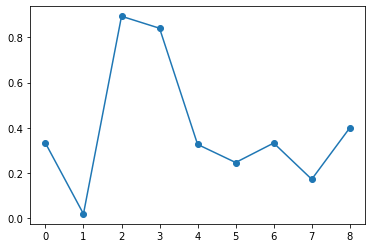

In [11]:
import matplotlib.pyplot as plt

plt.plot(ans, '-o')

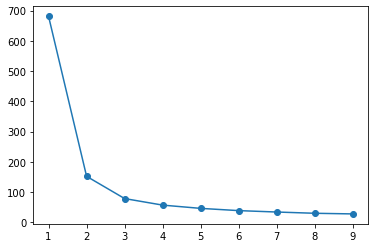

In [12]:
ans = []
for i in range(1, 10):
    km = KMeans(n_clusters=i, max_iter=300, init='k-means++', random_state=2019)

    res = km.fit(data)
    
    ans.append(res.inertia_)

plt.plot(range(1,10), ans, '-o')


In [13]:
# Silhouette

from sklearn.metrics import silhouette_samples#, silhouette_score

n = 3
km = KMeans(n_clusters=n, max_iter=300, init='k-means++', random_state=2019)

res = km.fit(data)

map_res = np.array(list(map(labeling, res.labels_)))
print(acurate(target, map_res))

score_samples = silhouette_samples(data, map_res) ## 개별요소에 점수쓰기
# score = silhouette_score(data, map_res) ## 평균점수 볼 수 있음
# print(score_samples)

0.893


In [14]:
sils = pd.DataFrame([map_res, score_samples]).T
sils.columns = ['clustering', 'silhouette']

In [15]:
sils.groupby('clustering')['silhouette'].mean()

clustering
0.0    0.798140
1.0    0.417320
2.0    0.451105
Name: silhouette, dtype: float64

## 실제 코딩시 유의 점

### initial points
- 필수적으로 초기점이 잡혀져 있어야 함
- 초기 점에 대해서는 kmeans++ 알고리즘을 확인해 보도 록 함
[starting points 논문](https://tigerprints.clemson.edu/cgi/viewcontent.cgi?article=1023&context=computing_pubs)
[설명글](https://lovit.github.io/nlp/machine%20learning/2018/03/19/kmeans_initializer/)

### 거리비교 포인트
- 유클리드, 맨해튼 등이 있지만 큰 차이는 없을 것으로 예상

### 평가
- 실루엣을 직접 구현해보는게 카카오 코테와 가장 유사 포인트 일듯
![실루엣](../assets/실루엣1.png)

In [16]:
n = 3
center = [[5.9016129,  2.7483871,  4.39354839, 1.43387097],
 [5.006,      3.428,      1.462,      0.246     ],
 [6.85,       3.07368421, 5.74210526, 2.07105263]]

In [17]:
def dist(a, b):
    f = 0
    for i in range(len(a)):
        f += (a[i]-b[i])**2
    return f ** 0.5

In [18]:
dist_score = [[] for _ in range(n)]
for i in range(len(data)):
    for j in range(3):
        dist_score[j].append(dist(center[j], data.iloc[i,:]))

        
print(dist_score)

[[3.4192506089453514, 3.3985742579459925, 3.5693566625896542, 3.422409623170955, 3.4672640347647534, 3.1467316194383583, 3.5165026450684147, 3.336549872064429, 3.5723377929268048, 3.3583767035240633, 3.3244913097755506, 3.3112687192031327, 3.466612721486661, 3.9057836210897747, 3.646648999118664, 3.494278809822301, 3.495248002184274, 3.3844498124175453, 3.1124594388960563, 3.377389316435574, 3.0747122422713242, 3.3150658848314247, 3.9316725345294405, 3.012337622308156, 3.062412692106202, 3.194145433566411, 3.179670892210883, 3.309417240054985, 3.376481832732579, 3.312729682719849, 3.2655065136626438, 3.180837364715957, 3.5314235292263025, 3.571028208621875, 3.319927693304954, 3.569040336389203, 3.43783275986095, 3.5311494815106816, 3.662052643637603, 3.3109277353595554, 3.4976467504270863, 3.6085003437402023, 3.68120560751137, 3.142782393799029, 3.0058519073256345, 3.394680452233046, 3.327885681746468, 3.5187952322880567, 3.3410425092735885, 3.4060170502763425, 1.2269752502691949, 0.68

In [19]:
dist_df = pd.DataFrame(dist_score)
df = dist_df.T
print(df) 

            0         1         2
0    3.419251  0.141351  5.059542
1    3.398574  0.447638  5.114943
2    3.569357  0.417109  5.279355
3    3.422410  0.525338  5.153590
4    3.467264  0.188627  5.104334
..        ...       ...       ...
145  1.449577  4.609163  0.611739
146  0.897479  4.217675  1.100724
147  1.179933  4.411845  0.653342
148  1.508893  4.599259  0.835724
149  0.834527  4.078282  1.180550

[150 rows x 3 columns]


In [20]:
ans = []
for i in range(len(df)):
    for j in range(3):
        if df.iloc[i,j] == min(df.iloc[i,:]):
            ans.append(j)
            break


In [21]:
ans = np.array(list(map(labeling, ans)))

In [22]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [23]:
print(acurate(ans, target))

0.893
